<a href="https://colab.research.google.com/github/utamiananda/Pemrograman_Python/blob/main/Tugas11Python_Utami_Ananda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [5]:
ls

GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/  GMB_11/
GMB_02/  GMB_04/  GMB_06/  GMB_08/  GMB_10/  nonGMB/


In [6]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [7]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Foto")
data = []
labels = []

[INFO] loading images...


In [8]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 128x128 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [9]:
print(labels)

[]


In [11]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

ValueError: ignored

In [14]:
print(labels)

[]


In [12]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

ValueError: ignored

In [15]:
from keras.applications.mobilenet import MobileNet
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization

In [16]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [ ]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 91ms/step - loss: 0.0485 - accuracy: 0.9795 - val_loss: 1.5069 - val_accuracy: 0.7823
Epoch 2/25
14/14 [==============================] - 1s 84ms/step - loss: 0.0402 - accuracy: 0.9840 - val_loss: 1.3194 - val_accuracy: 0.7891
Epoch 3/25
14/14 [==============================] - 1s 81ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 1.1748 - val_accuracy: 0.7959
Epoch 4/25
14/14 [==============================] - 1s 84ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.0916 - val_accuracy: 0.7891
Epoch 5/25
14/14 [==============================] - 1s 85ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0718 - val_accuracy: 0.8027
Epoch 6/25
14/14 [==============================] - 1s 85ms/step - loss: 8.7937e-04 - accuracy: 1.0000 - val_loss: 1.0764 - val_accuracy: 0.8027
Epoch 7/25
14/14 [==============================] - 1s 85ms/step - loss: 6.8261e-04 - accuracy: 1.0000 - val_loss: 1.0804 -

In [17]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.90      0.88      0.89        32
      GMB_03       0.70      0.89      0.78        18
      GMB_05       0.80      0.80      0.80        40
      GMB_07       0.77      0.71      0.74        28
      GMB_09       0.89      0.83      0.86        29

    accuracy                           0.82       147
   macro avg       0.81      0.82      0.81       147
weighted avg       0.82      0.82      0.82       147



In [ ]:
model.save('nnmodel_leaf')

INFO:tensorflow:Assets written to: nnmodel_leaf/assets


In [18]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/dataset/GMB_05/IMG_20200814_121915_HDR.jpg'

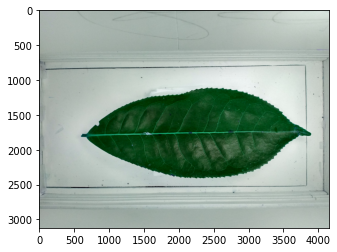

In [19]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [20]:
image_testing = Image.open('/content/drive/MyDrive/dataset/GMB_05/IMG_20200814_121915_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [22]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.16214088 0.272304   0.19204828 0.21525519 0.15825169]]


AttributeError: ignored